<a href="https://colab.research.google.com/github/Acyuth/EDA_Project/blob/main/22BDS0027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course Project

**Acyuth G**

**22BDS0027**

In [1]:
#Importing Libraries that are required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/HepatitisCdata.csv"
df = pd.read_csv(url)
#Saving a copy of the Dataset
df.to_csv("EDAProjectDataset.csv", index=False)
#Viewing the first 5 rows of the Dataset
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Dimensions of the Dataset

In [3]:
df.shape
print("The number of Rows are:", df.shape[0])
print("The number of Columns are:", df.shape[1])

The number of Rows are: 615
The number of Columns are: 14


Summary Statistics

In [4]:
#general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [5]:
#Statistic info for each numeric column
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [6]:
#info for non numeric columns
df.describe(include='object')

,Category,Sex
count,615,615
unique,5,2
top,0=Blood Donor,m
freq,533,377


Data Handling

In [7]:
print("Missing values in each column are:")
print(df.isnull().sum())

Missing values in each column are:
Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


There is only missing numeric data <br>
There is no missing categorical data

In [8]:
#datatype of each column
print("\nData Types:")
print(df.dtypes)


Data Types:
Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object


In [9]:
#The number of unique values in each object column
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: Category
Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

Column: Sex
Sex
m    377
f    238
Name: count, dtype: int64


Data Cleaning

In [10]:
# Filling missing numeric values with median
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-1078164250.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [11]:
# Verifying if any missing values exist after filling
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64


Univariate Analysis

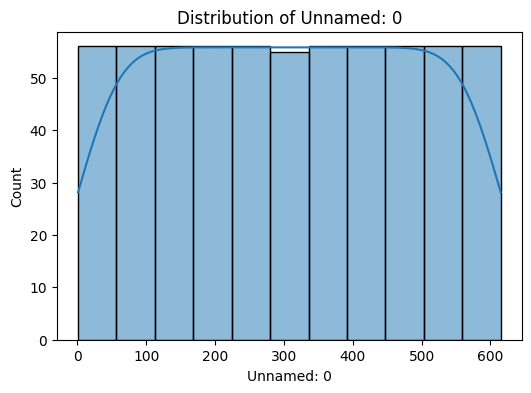

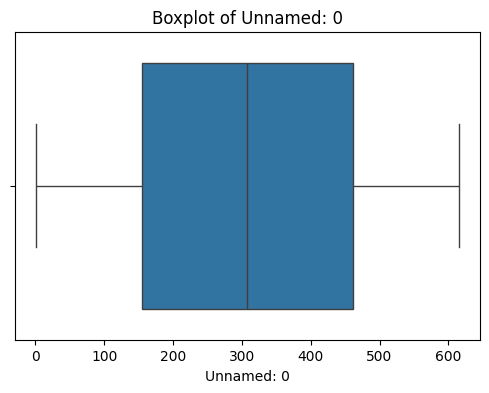

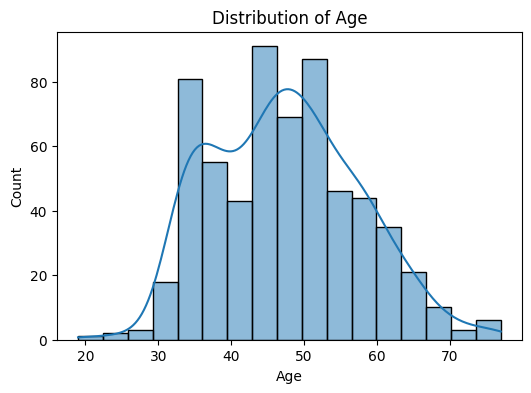

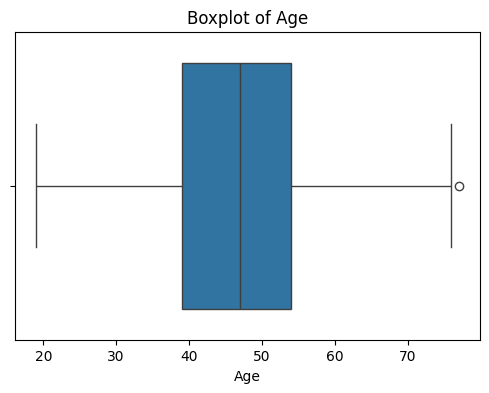

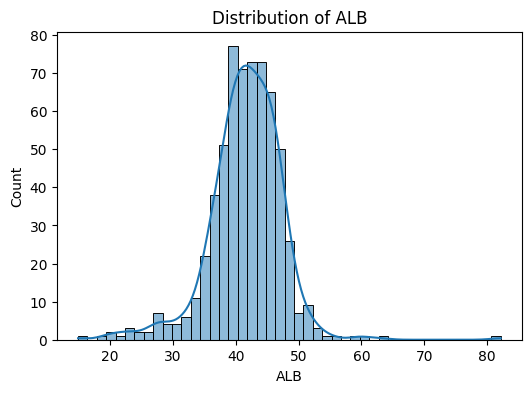

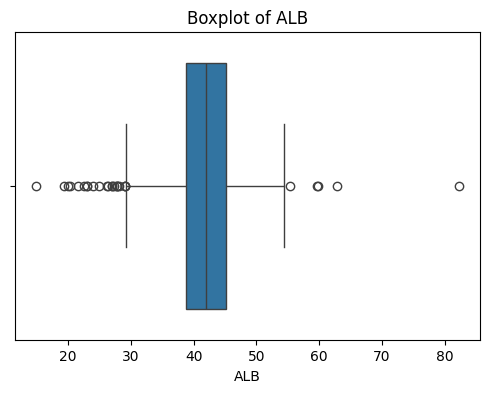

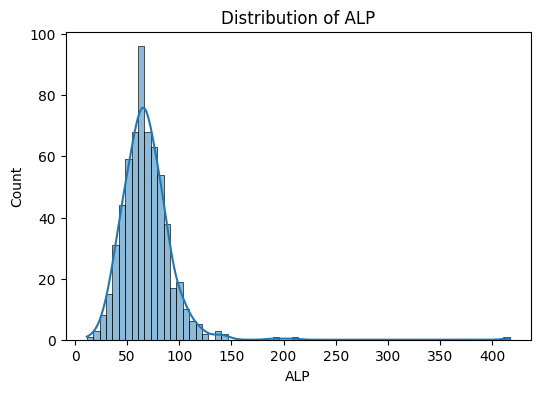

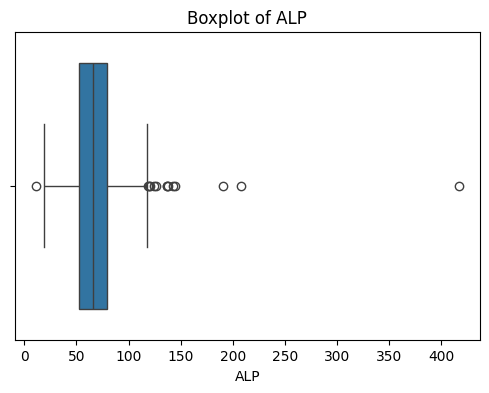

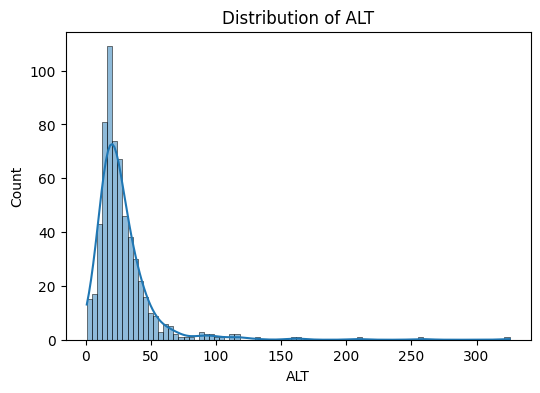

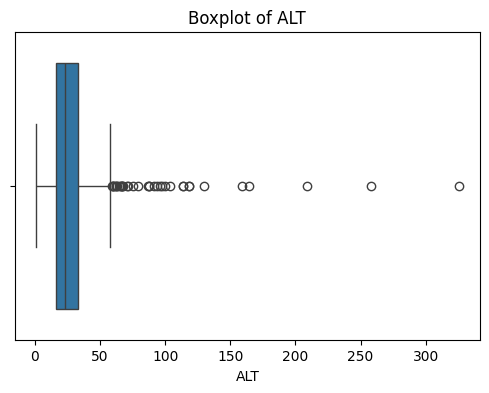

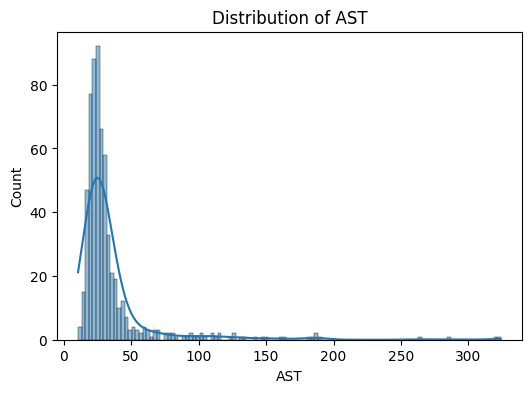

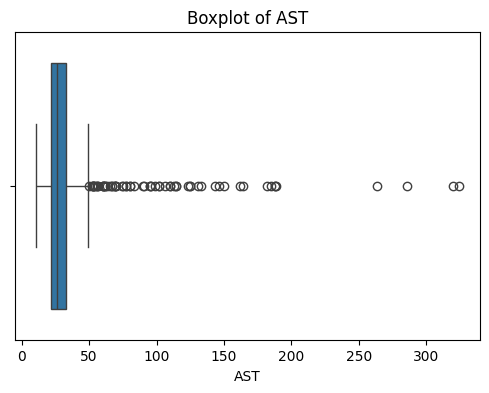

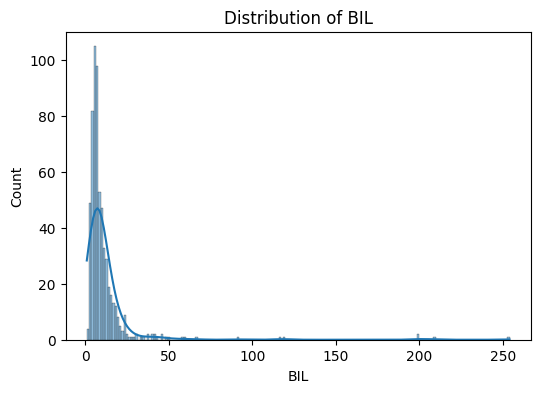

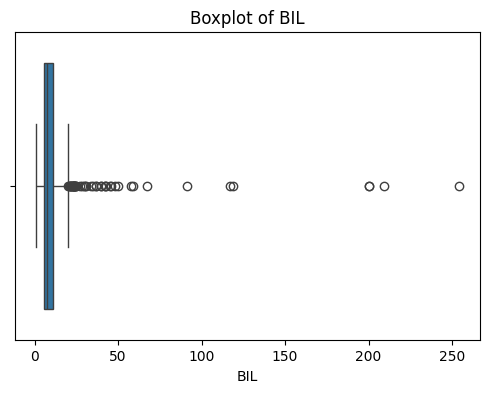

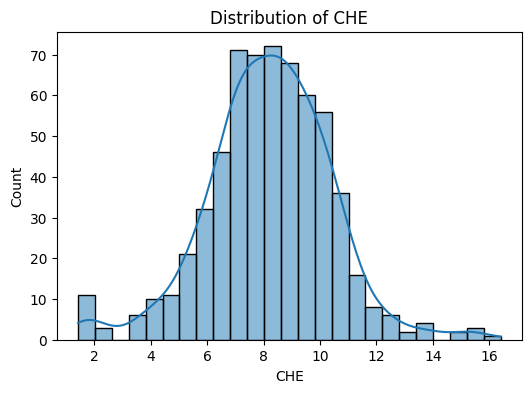

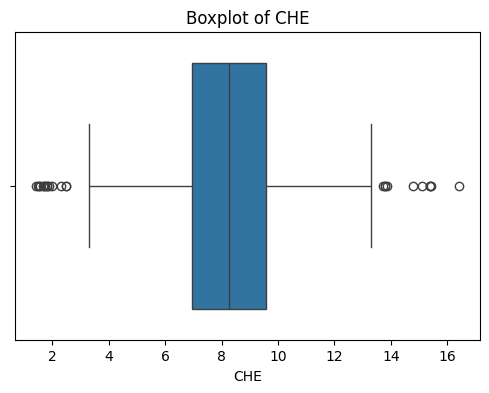

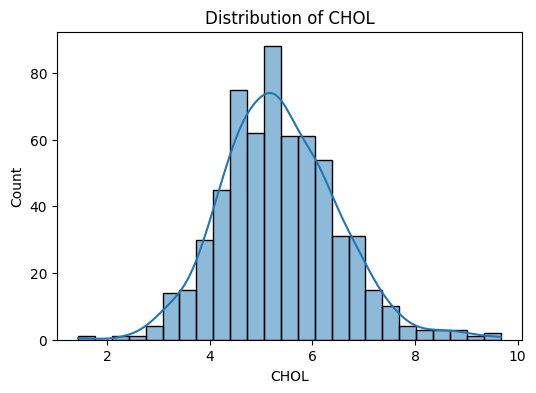

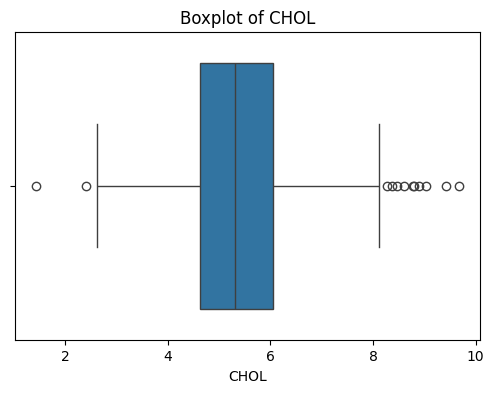

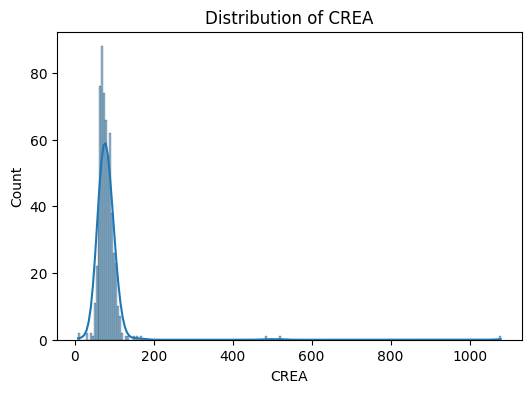

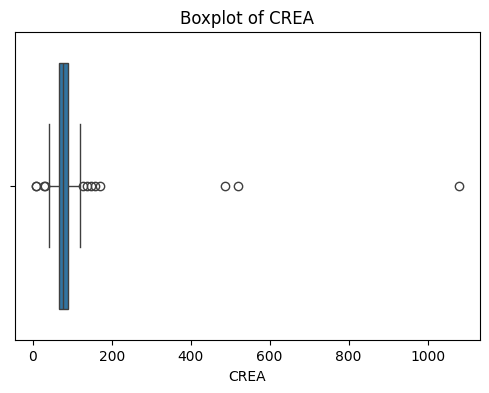

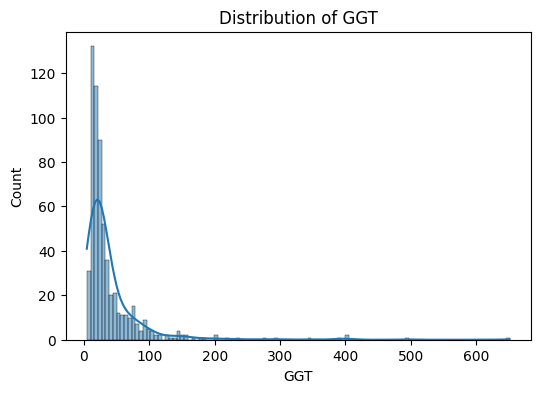

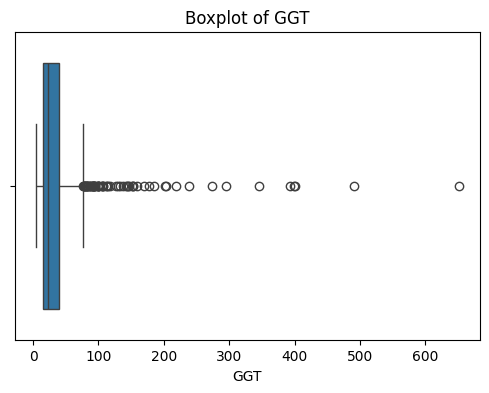

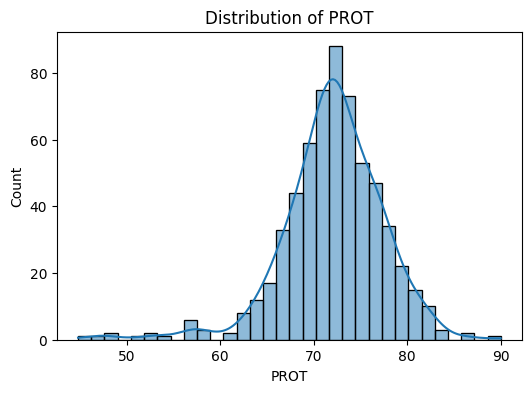

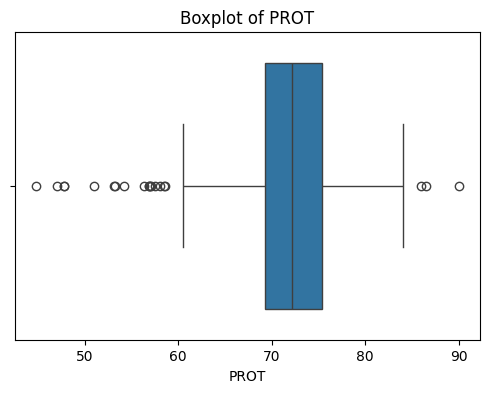

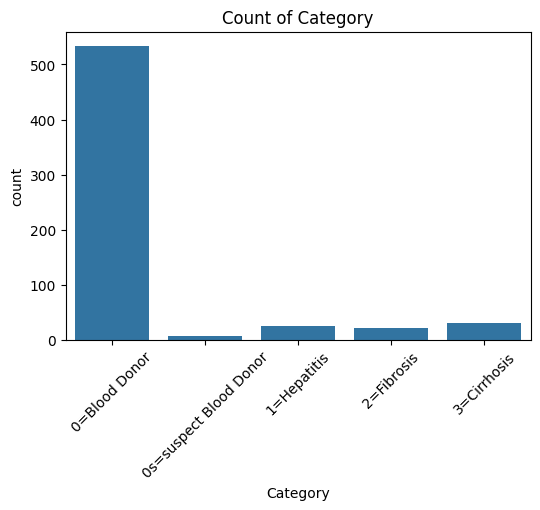

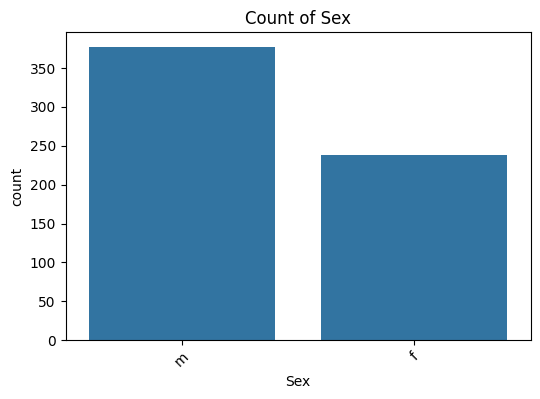

In [12]:
# Numeric columns
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


Univariate Analysis
For numerical variables, two plots are generated:

Histograms with KDE (Kernel Density Estimation) to visualize the distribution, central tendency, and spread of the data.

Boxplots to identify the median, interquartile range, and potential outliers.

For categorical variables, count plots are created to display the frequency distribution of each category.

This analysis helps in understanding the individual behavior of each variable before exploring relationships between them in bivariate or multivariate analysis.

Bivariate Analysis

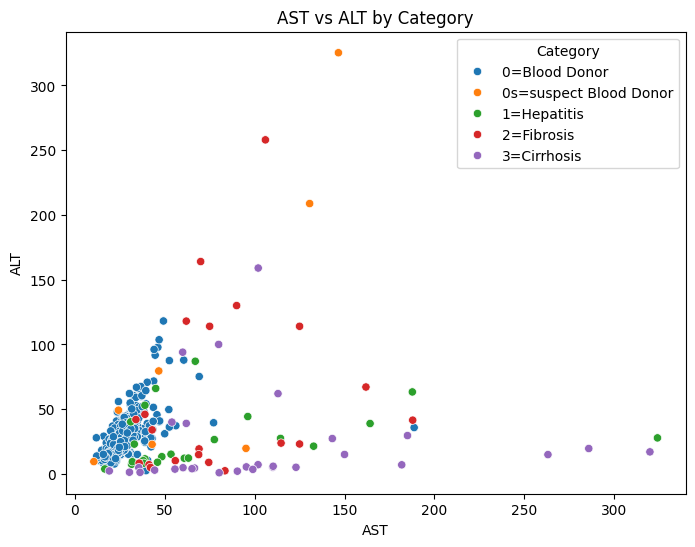

In [13]:
# Numerical vs Numerical
plt.figure(figsize=(8,6))
sns.scatterplot(x='AST', y='ALT', hue='Category', data=df)
plt.title("AST vs ALT by Category")
plt.show()

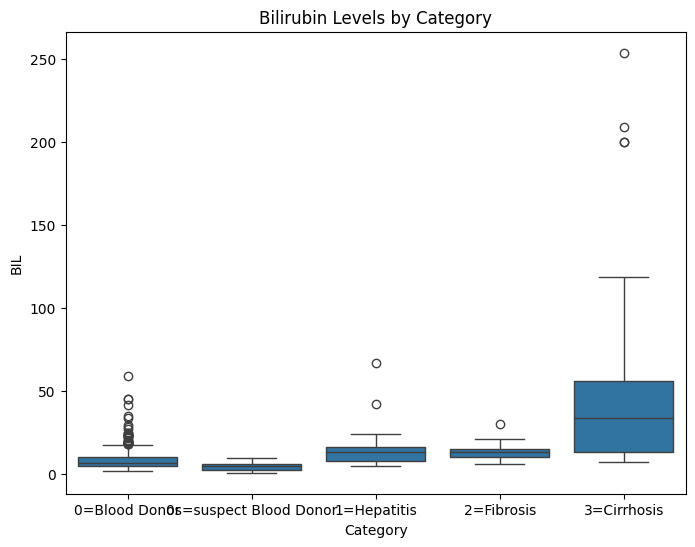

In [14]:
# Numerical vs Categorical
plt.figure(figsize=(8,6))
sns.boxplot(x='Category', y='BIL', data=df)
plt.title("Bilirubin Levels by Category")
plt.show()


The analysis of more than one (that is, exactly two) type of variable.

Bivariate analysis is used to find out whether there is a relationship between two different variables.

Generally, bivariate analysis helps us to predict a value for one variable (that is, a dependent variable) if we are aware of the value of the independent variable.

Multivariate Analysis

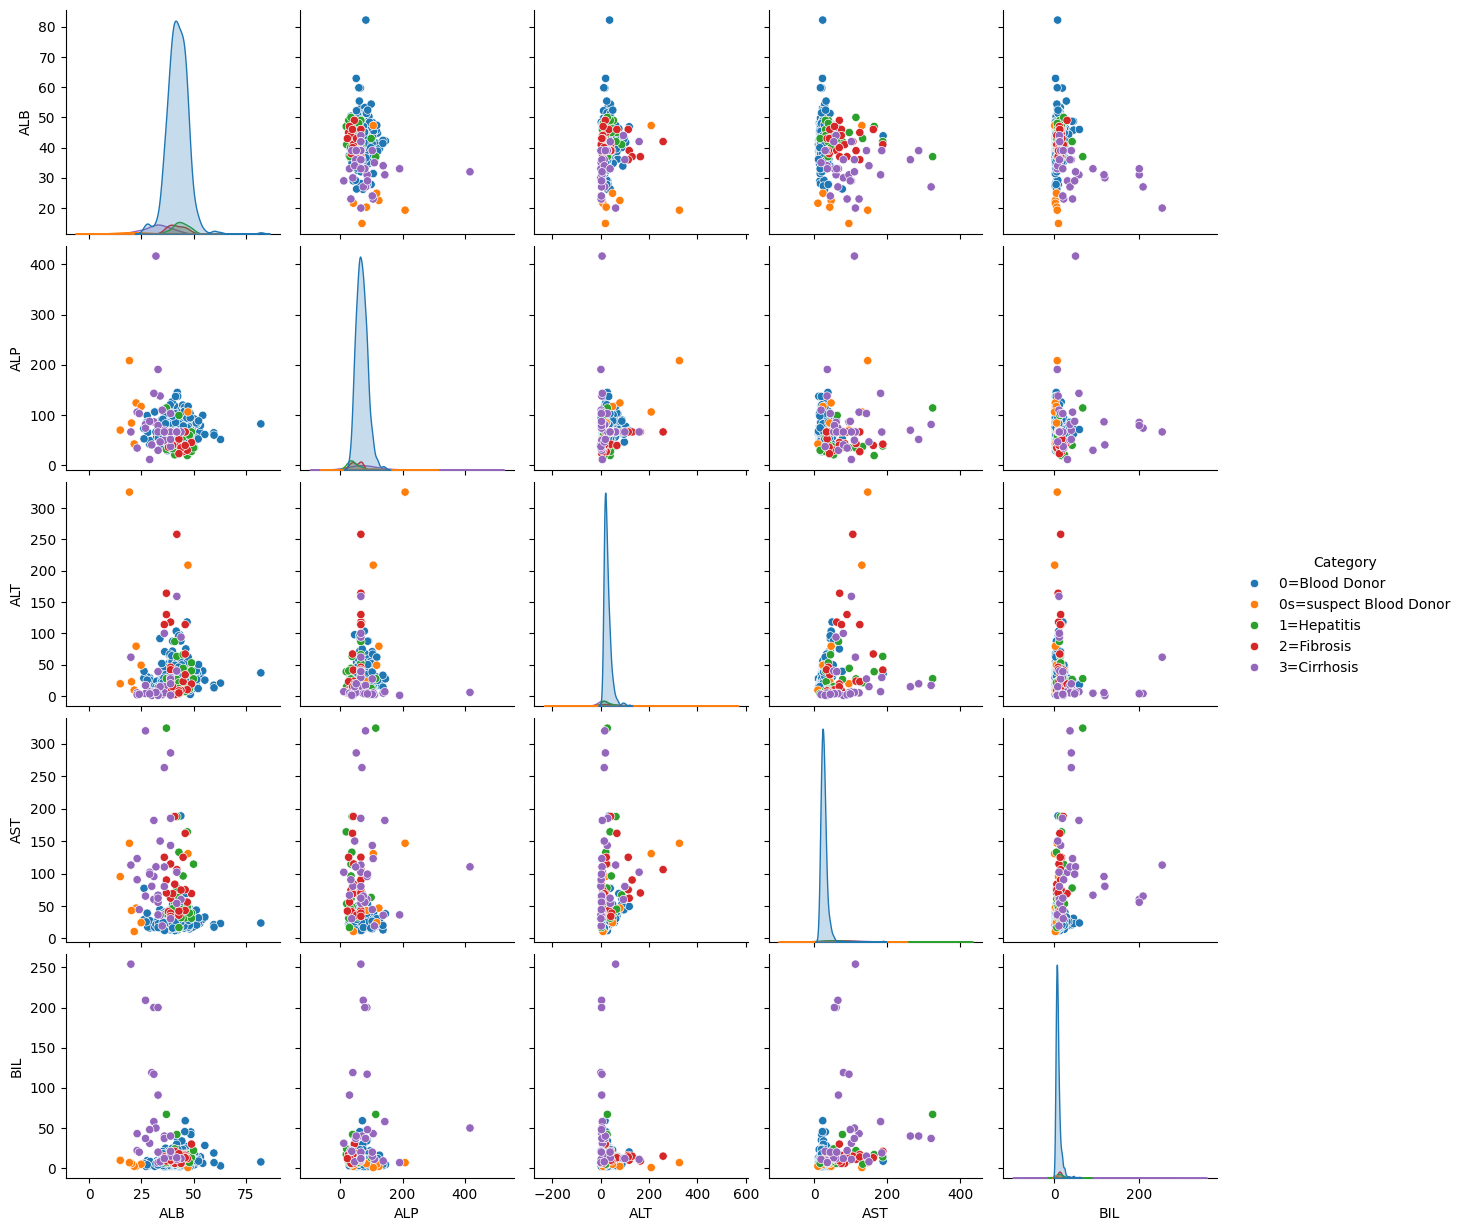

In [15]:
# Pairplot for selected features
selected_cols = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'Category']
sns.pairplot(df[selected_cols], hue='Category')
plt.show()

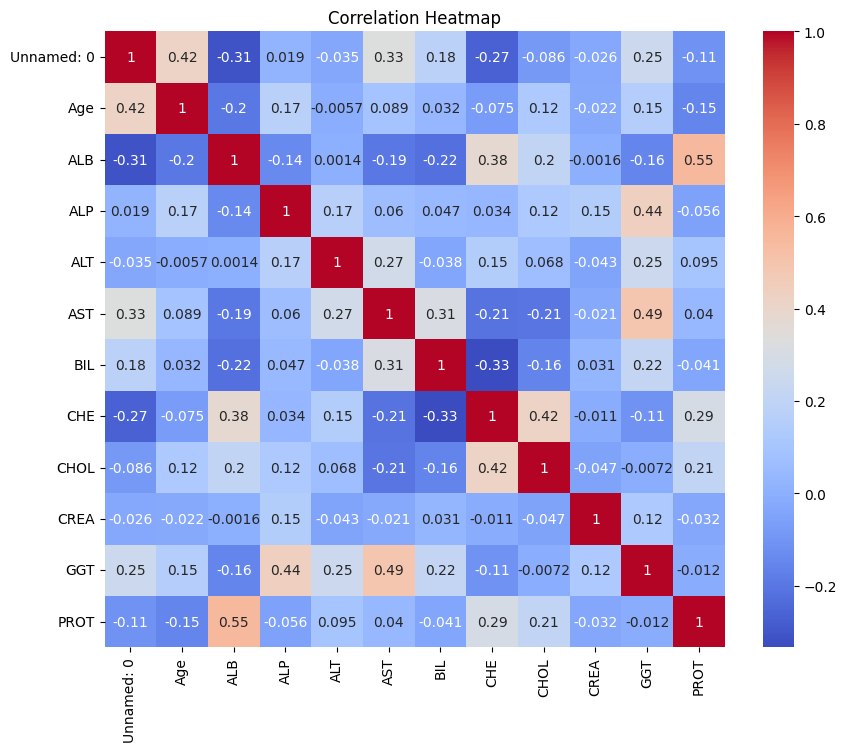

In [16]:
# Correlation heatmap
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Multivariate analysis is the analysis of three or more variables.<br>
This allows us to look at correlations (that is, how one variable changes with respect to another) and attempt to make predictions for future behavior more accurately than with bivariate analysis.<br>
We can do this using pair plots and heatmaps.

# PHASE 2
##1D Analysis

Measures of Central Tendency

In [38]:
from scipy import stats

num_cols = df.select_dtypes(include=np.number).columns
summary_list = []

for col in num_cols:
    x = df[col].dropna()

    mean = x.mean()
    wmean = np.average(x, weights=np.ones(len(x)))
    rms = np.sqrt(np.mean(x**2))
    harmonic = len(x)/np.sum(1/x) if np.all(x>0) else np.nan
    geom = stats.gmean(x) if np.all(x>0) else np.nan
    median = x.median()
    mode = x.mode()[0] if not x.mode().empty else np.nan

    summary_list.append([col, mean, wmean, rms, harmonic, geom, median, mode])

summary_table = pd.DataFrame(summary_list, columns=['Column','Mean','Weighted Mean','RMS','Harmonic Mean','Geometric Mean','Median','Mode'])
summary_table


,Column,Mean,Weighted Mean,RMS,Harmonic Mean,Geometric Mean,Median,Mode
0,Unnamed: 0,308.000000,308.000000,355.503399,87.861527,227.770269,308.00,1.00
1,Age,47.408130,47.408130,48.461031,45.249272,46.334658,47.00,46.00
2,ALB,41.620732,41.620732,42.018954,40.663102,41.179817,41.95,39.00
3,ALP,68.222927,68.222927,72.876843,60.950903,64.567164,66.20,66.20
4,ALT,28.441951,28.441951,38.152172,17.387046,22.822706,23.00,16.60
5,AST,34.786341,34.786341,47.992738,26.349368,29.022095,25.90,22.00
6,BIL,11.396748,11.396748,22.722002,6.541703,8.002742,7.30,6.00
7,CHE,8.196634,8.196634,8.487746,7.275404,7.826461,8.26,7.52
8,CHOL,5.366992,5.366992,5.483138,5.119986,5.247339,5.30,5.30
9,CREA,81.287805,81.287805,95.285664,73.815101,77.205204,77.00,74.00


Measures of Dispersion

In [40]:
num_cols = df.select_dtypes(include=np.number).columns

disp_shape_list = []

for col in num_cols:
    x = df[col].dropna()
    rng = x.max() - x.min()
    iqr = x.quantile(0.75) - x.quantile(0.25)
    deciles = x.quantile([0.1,0.9])
    interdecile = deciles[0.9] - deciles[0.1]
    std_dev = x.std()
    var = x.var()

    skewness = x.skew()
    kurtosis = x.kurt()

    disp_shape_list.append([col, rng, iqr, interdecile, std_dev, var, skewness, kurtosis])

disp_shape_table = pd.DataFrame(disp_shape_list, columns=[
    'Column','Range','IQR','Interdecile Range','Std Dev','Variance','Skewness','Kurtosis'
])

disp_shape_table


,Column,Range,IQR,Interdecile Range,Std Dev,Variance,Skewness,Kurtosis
0,Unnamed: 0,614.00,307.000,491.200,177.679487,31570.000000,0.000000,-1.200000
1,Age,58.00,15.000,27.000,10.055105,101.105146,0.267134,-0.386473
2,ALB,67.30,6.400,11.760,5.775935,33.361430,-0.177189,5.997830
3,ALP,405.30,26.350,49.460,25.646364,657.736004,4.730036,56.729857
4,ALT,324.40,16.650,34.800,25.449889,647.696837,5.510989,47.210523
5,AST,313.40,11.300,34.300,33.090690,1094.993787,4.940327,30.836641
6,BIL,253.20,5.900,14.300,19.673150,387.032823,8.385437,83.186732
7,CHE,14.99,2.655,5.056,2.205657,4.864924,-0.110233,1.314730
8,CHOL,8.24,1.435,2.752,1.123499,1.262251,0.381835,0.756130
9,CREA,1071.10,21.000,38.000,49.756166,2475.676056,15.169291,280.100237


Plots

PROT
71.9    15
73.1    13
69.9     9
72.0     9
72.4     9
        ..
78.1     1
60.6     1
57.1     1
58.5     1
82.7     1
Name: count, Length: 198, dtype: int64


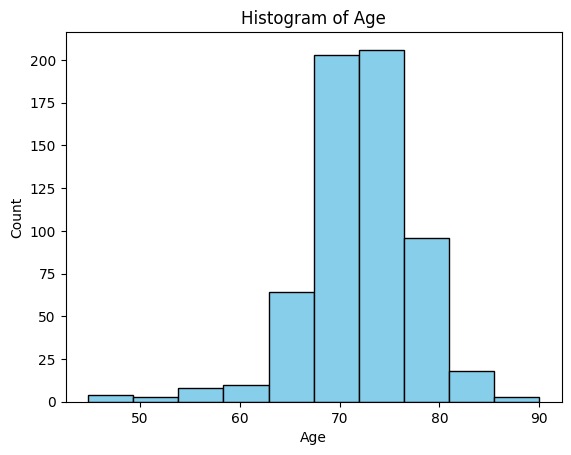

PROT
(71.92, 80.96]     0.491057
(62.88, 71.92]     0.434146
(80.96, 90.0]      0.034146
(53.84, 62.88]     0.029268
(44.755, 53.84]    0.011382
Name: proportion, dtype: float64


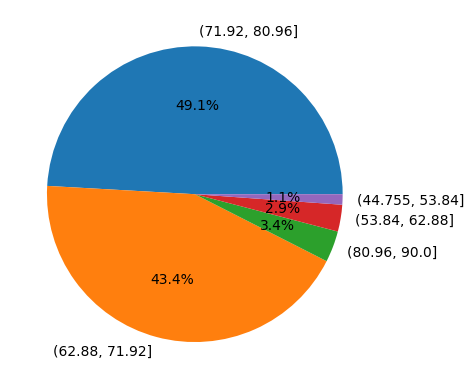

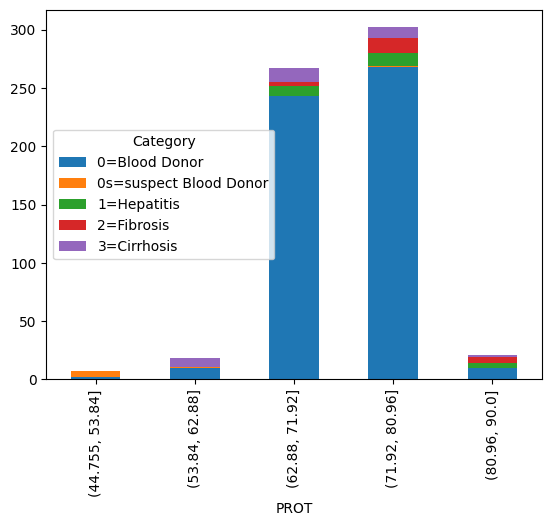

In [41]:
print(x.value_counts())

plt.hist(x, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

print(pd.cut(x, bins=5).value_counts(normalize=True))

plt.pie(pd.cut(x, bins=5).value_counts(), labels=pd.cut(x, bins=5).value_counts().index, autopct='%1.1f%%')
plt.show()

if 'Category' in df.columns:
    cross_tab = pd.crosstab(pd.cut(x, bins=5), df['Category'])
    cross_tab.plot(kind='bar', stacked=True)
    plt.show()


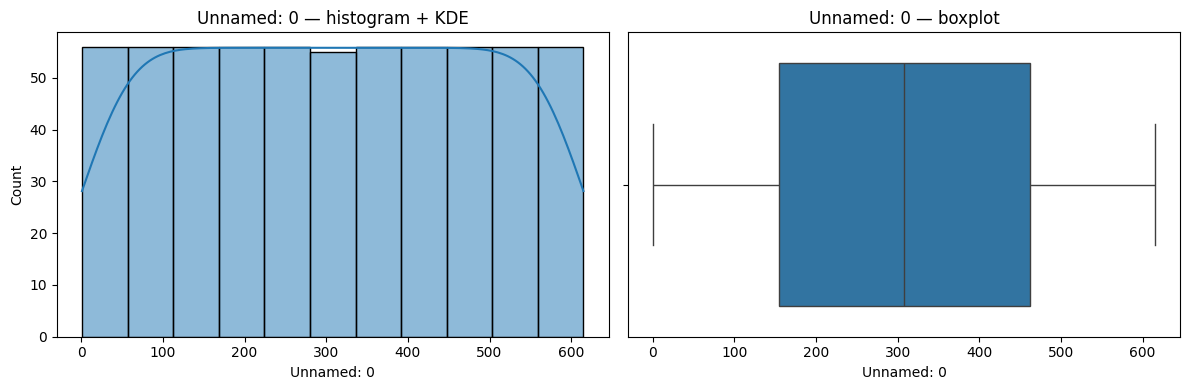

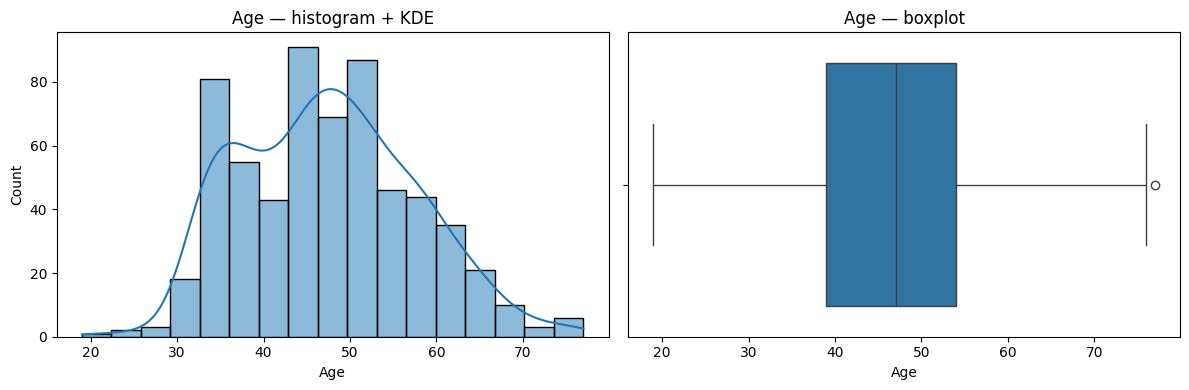

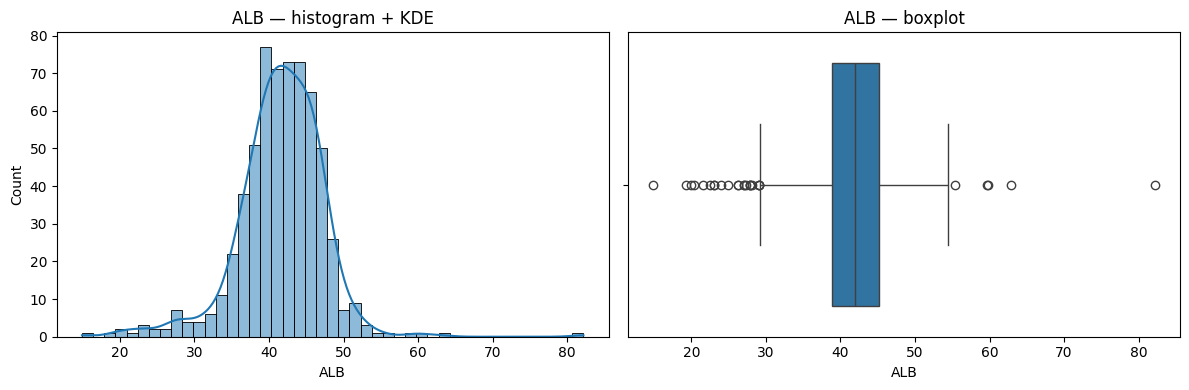

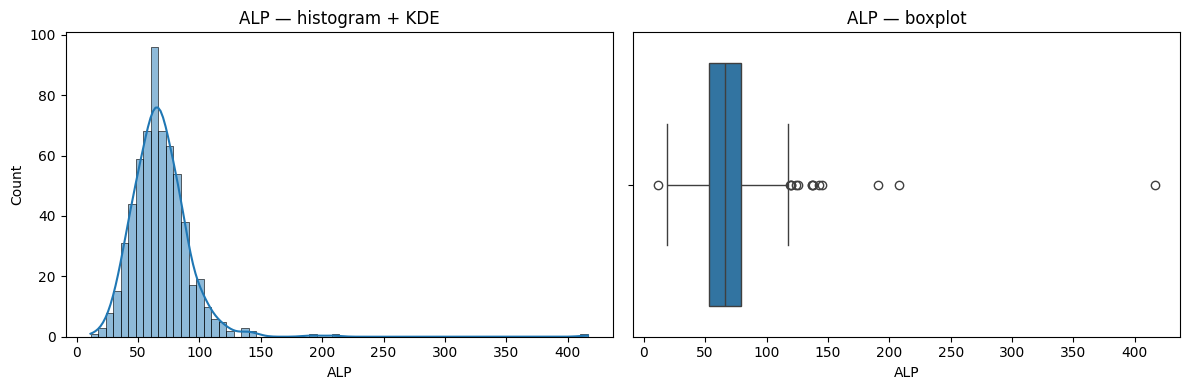

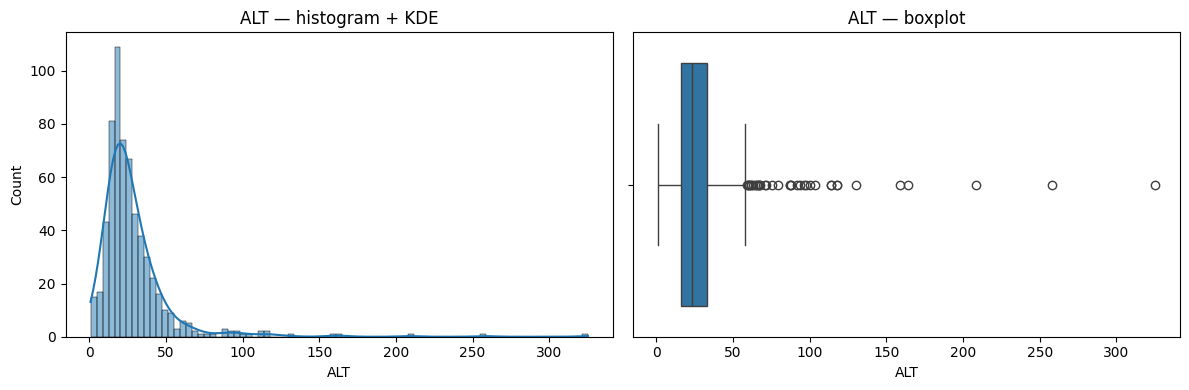

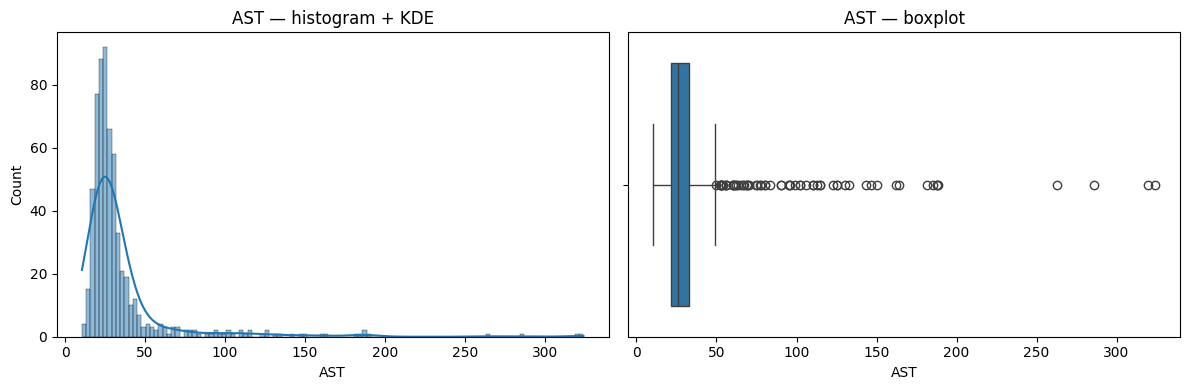

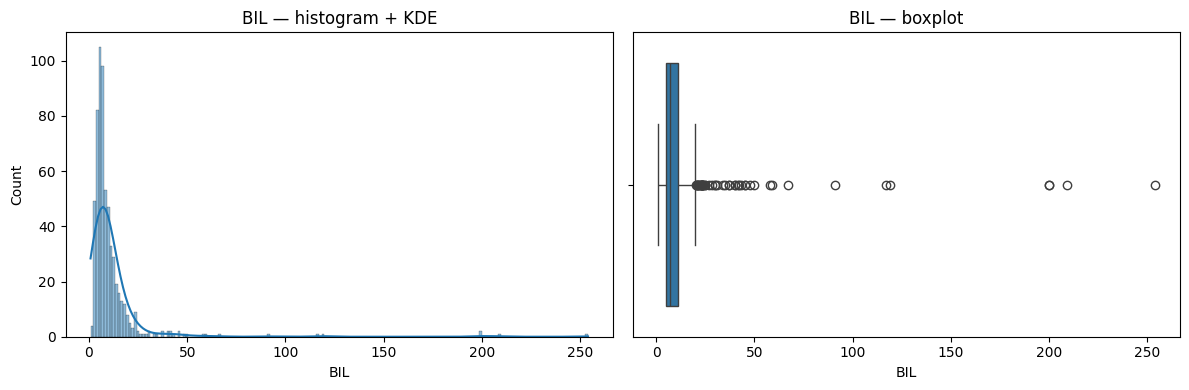

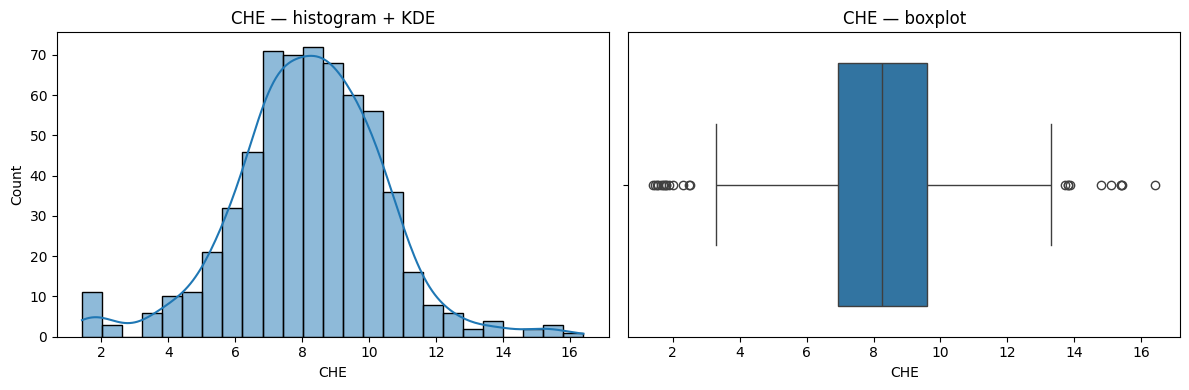

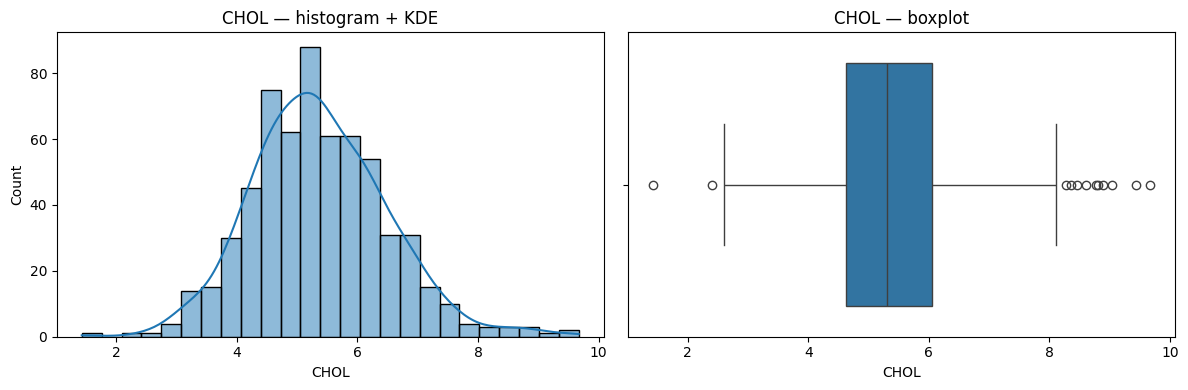

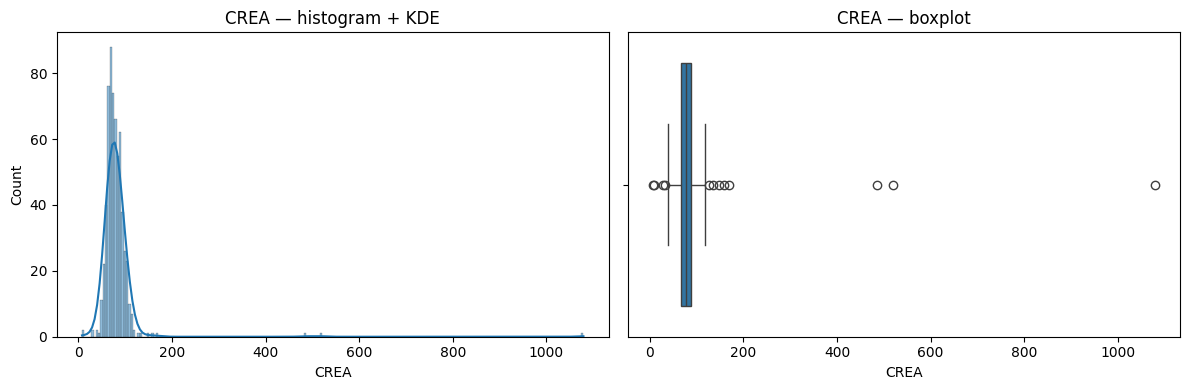

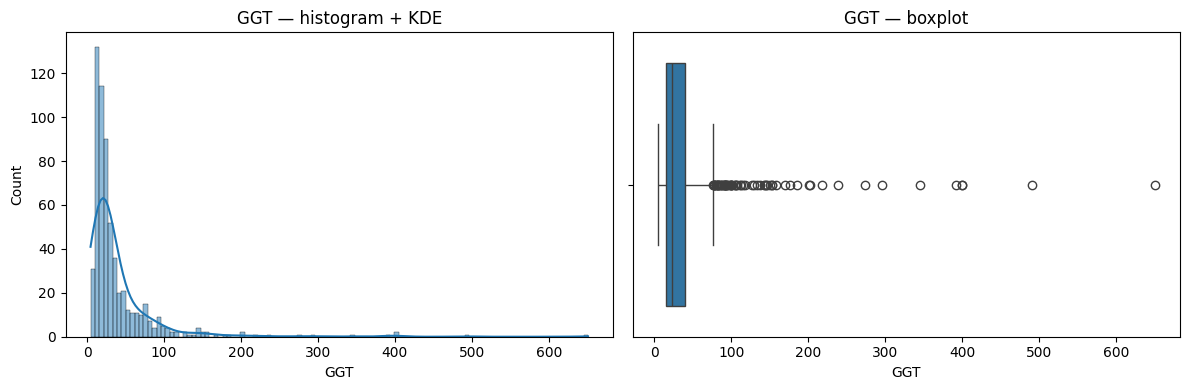

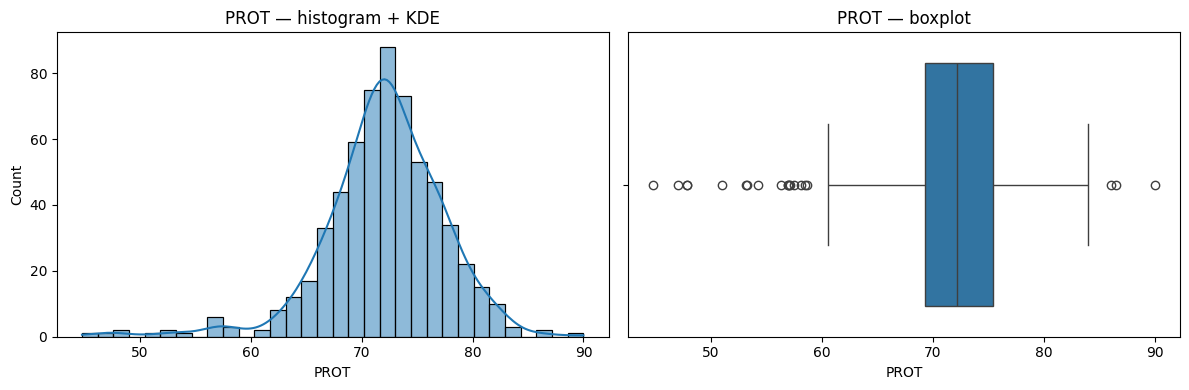

In [43]:
for c in num_cols:
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    sns.histplot(df[c].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f"{c} — histogram + KDE")
    sns.boxplot(x=df[c], ax=axes[1])
    axes[1].set_title(f"{c} — boxplot")
    plt.tight_layout()
    plt.show()

Categorical columns: ['Category', 'Sex']

Column: Category
Top values:
 Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64


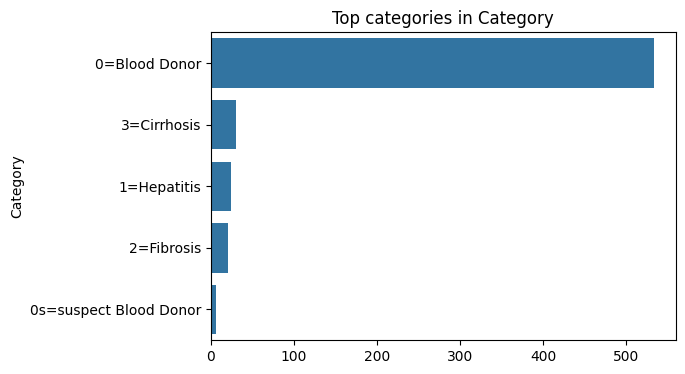


Column: Sex
Top values:
 Sex
m    377
f    238
Name: count, dtype: int64


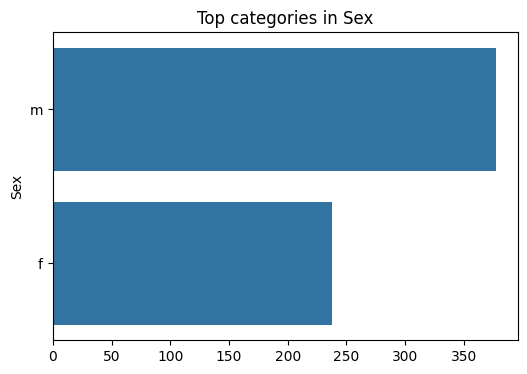

In [44]:
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("Categorical columns:", cat_cols)

for c in cat_cols:
    vc = df[c].value_counts(dropna=False)
    print(f"\nColumn: {c}\nTop values:\n", vc.head(10))
    plt.figure(figsize=(6,4))
    sns.barplot(y=vc.index[:10], x=vc.values[:10])
    plt.title(f"Top categories in {c}")
    plt.show()